# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [3]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


Разделим данные на тех, кто за и тех, кто против

In [4]:
data_p = data[data.comment_class == 1]
data_n = data[data.comment_class == -1]

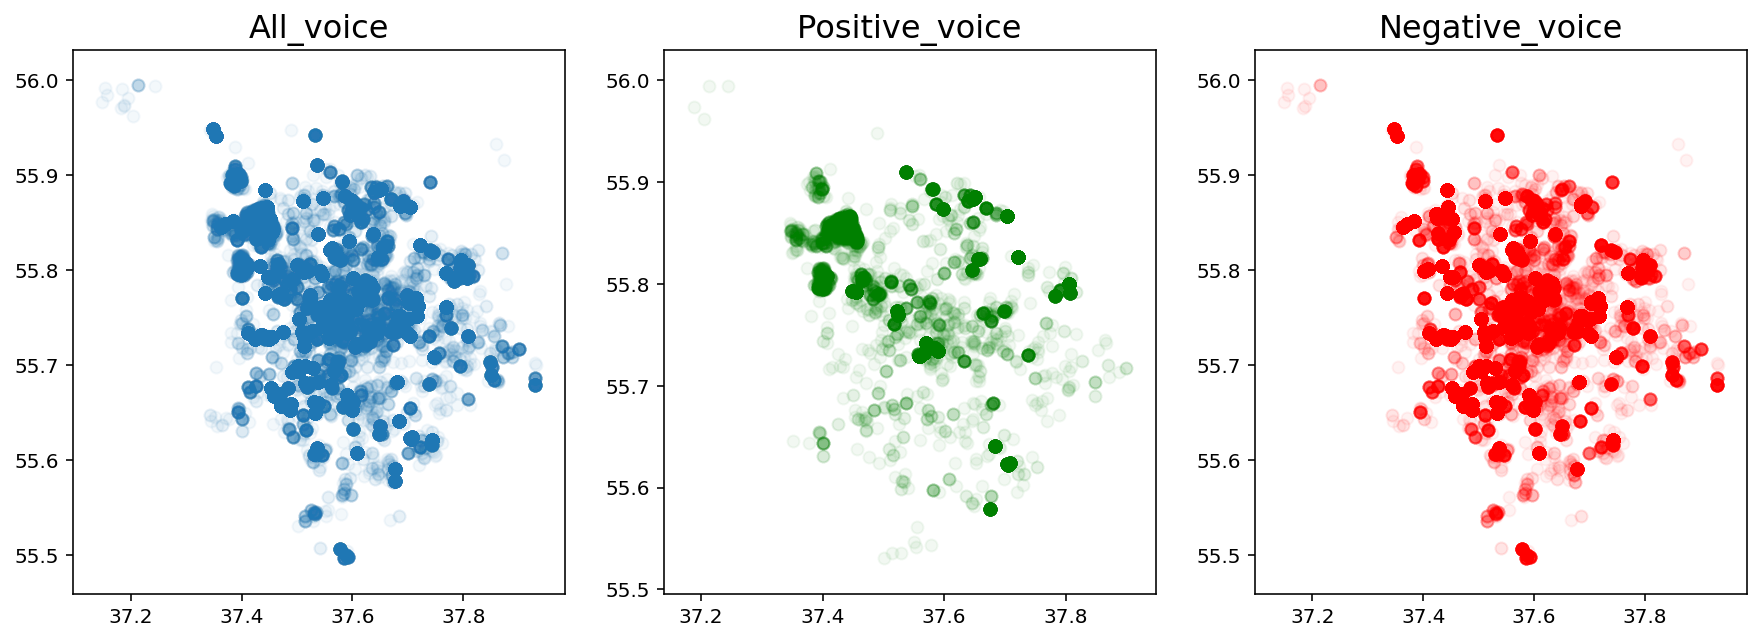

In [5]:
# отобразим плохие и хорошие голоса на карте
rcParams['figure.figsize'] = (5, 5)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5)) 

ax1.scatter(x=data.x, y=data.y, alpha=0.05)
ax2.scatter(x=data_p.x, y=data_p.y, alpha=0.05, color='g')
ax3.scatter(x=data_n.x, y=data_n.y, alpha=0.05, color='r')

titles = ["All_voice", "Positive_voice", "Negative_voice"]
colors = ["b", "g", "r"]
all_data = [data, data_p, data_n]

for number, title in zip (fig.axes, titles):
    number.set_title(title, fontsize=16)

__Кластеризация__

In [6]:
from sklearn.cluster import KMeans, DBSCAN

__KMeans__

визуально разделяем город на районы безотносительно голосов

In [7]:
data_test = data.drop('comment_class', axis=1)
km = KMeans(n_clusters=8)
km.fit(data_test)
clusters = km.predict(data_test)

In [8]:
for i in range(8):
    print (i,'cluster =',len(data_test[clusters==i]))

0 cluster = 13762
1 cluster = 13372
2 cluster = 13886
3 cluster = 13478
4 cluster = 13897
5 cluster = 13681
6 cluster = 13590
7 cluster = 13140


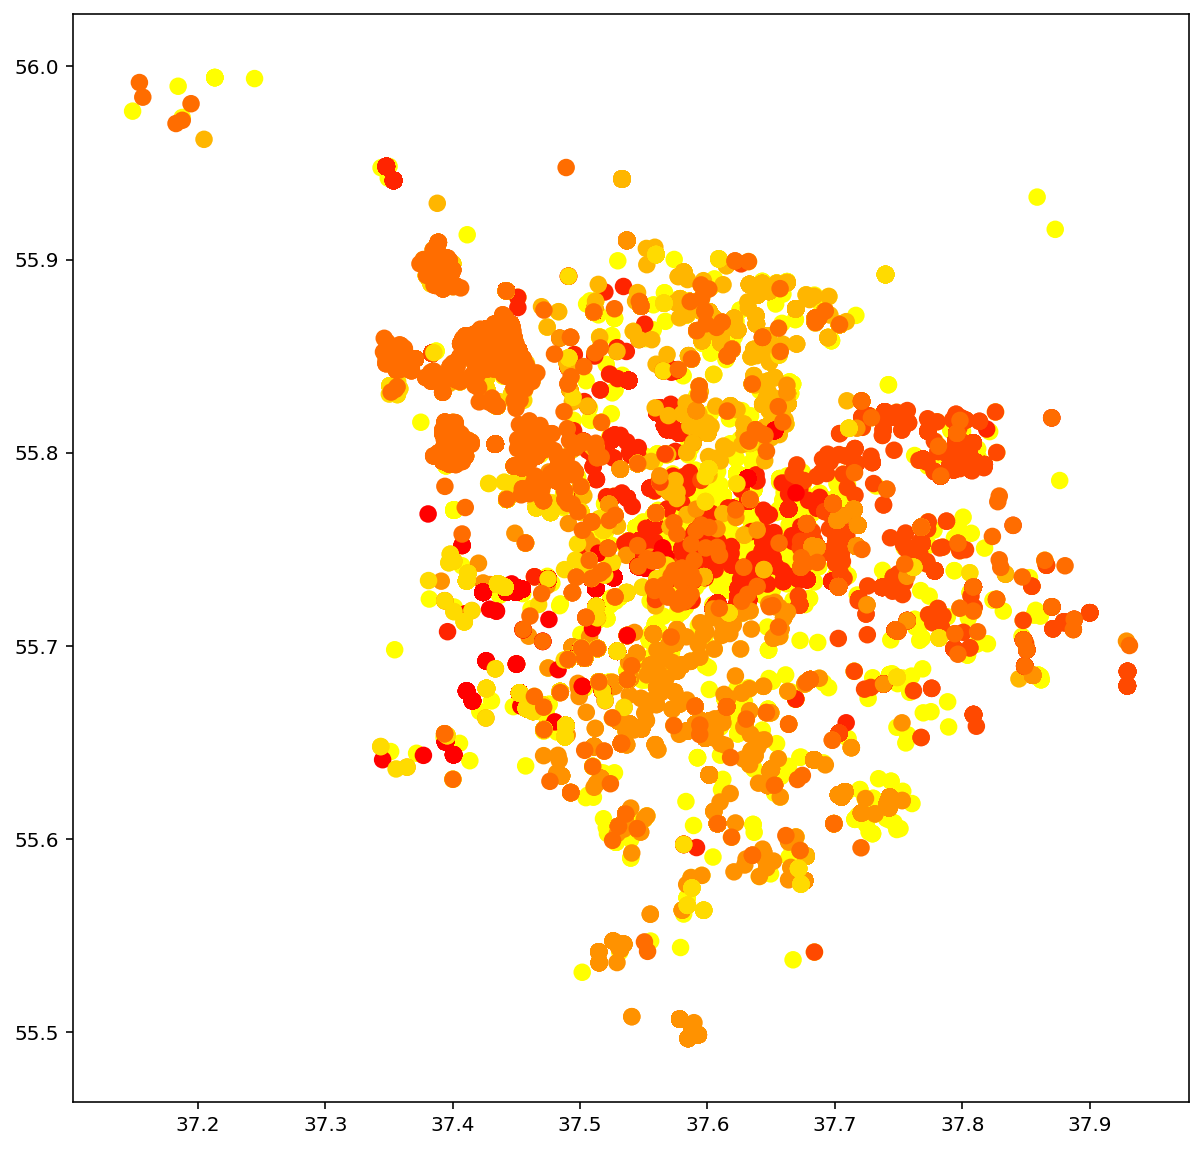

In [9]:
rcParams['figure.figsize'] = (10, 10)
plt.scatter(data_test.x, data_test.y, c=clusters, cmap='autumn', s=60)

определение оптимального количества кластеров

In [10]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_km = KMeans(n_clusters=k)
    clusters_km = clf_km.fit_predict(data_test, )
    k_inertia.append(clf_km.inertia_/100)

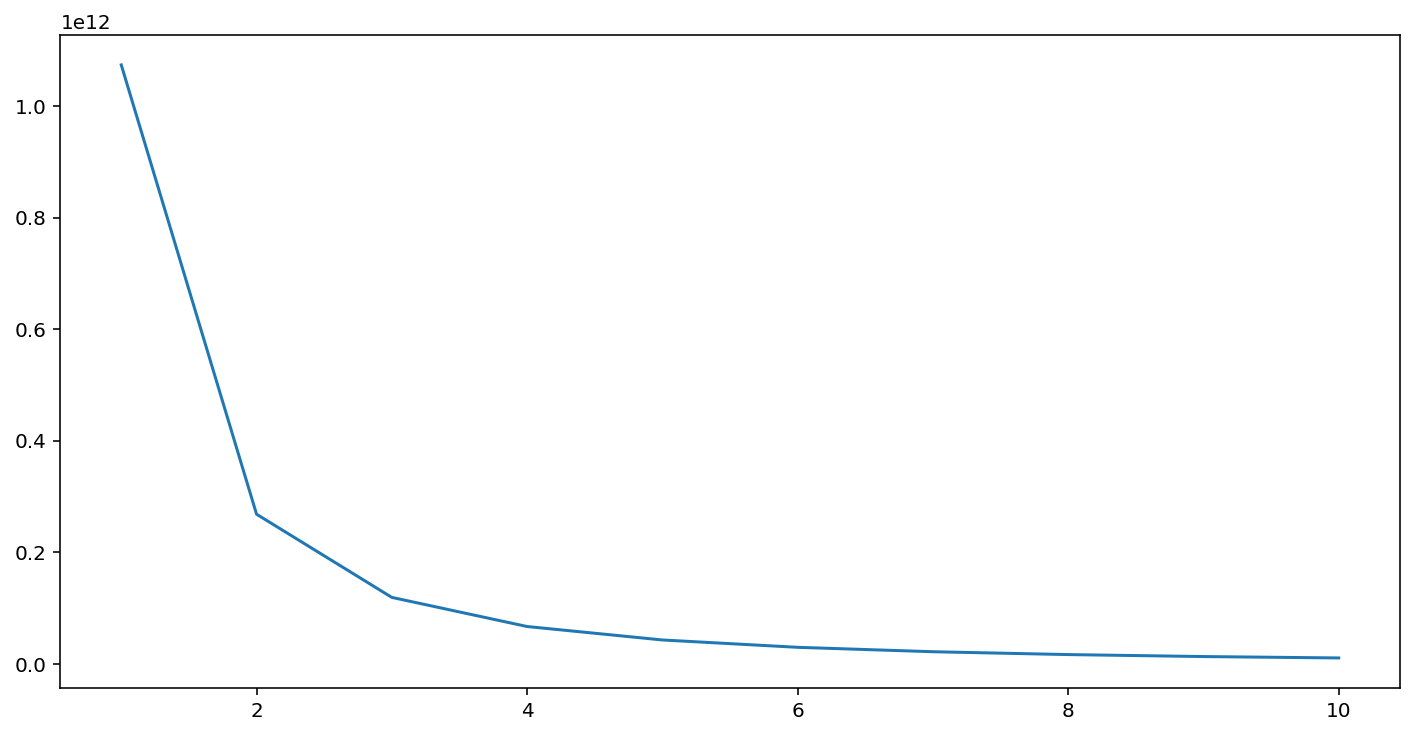

In [11]:
rcParams['figure.figsize'] = (12,6)
plt.plot(ks, k_inertia)

Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

In [12]:
diff = np.diff(k_inertia)

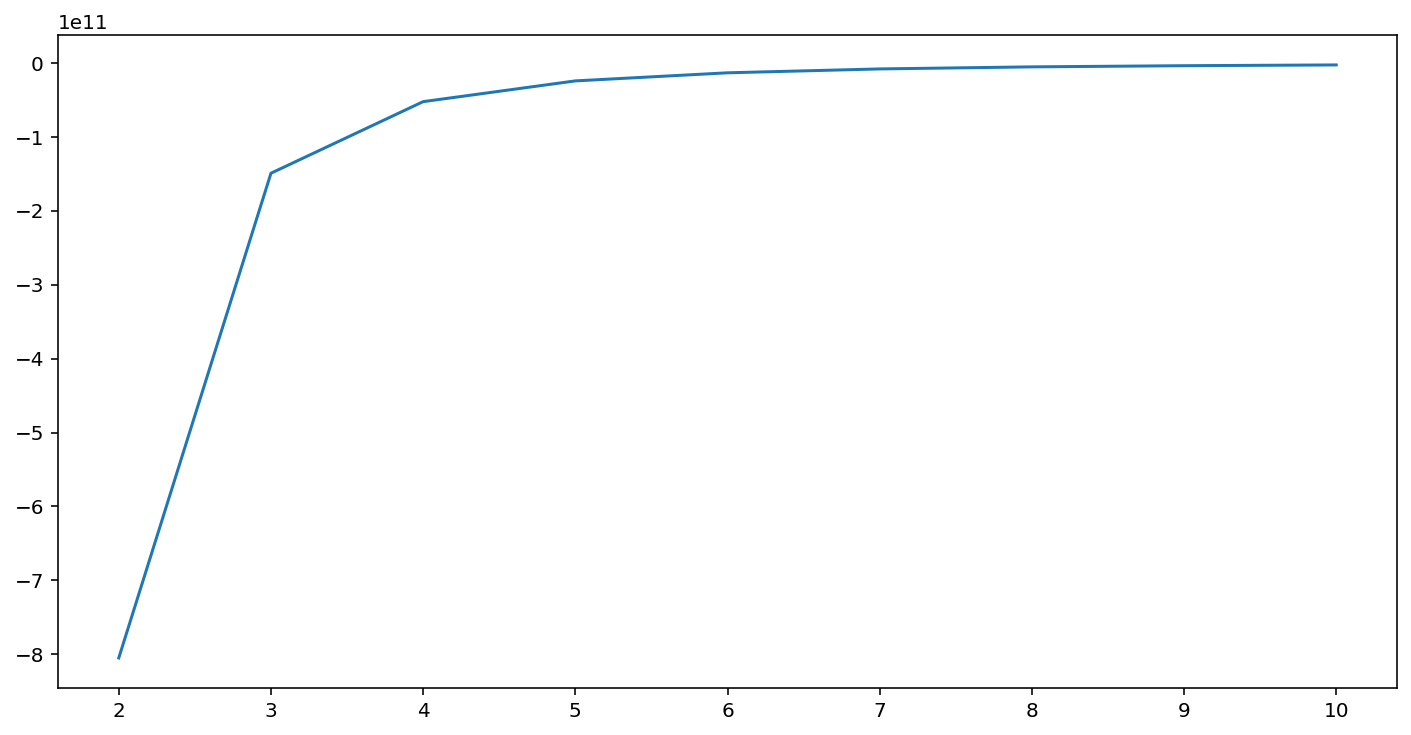

In [13]:
plt.plot(ks[1:], diff)

Из графика видно, что можно попробовать оставить 4 кластера

Кластеризуем отдельно тех, кто голосовал за и тех, кто голосоал против

In [16]:
data_p_t = data_p.drop('comment_class', axis=1)
data_n_t = data_n.drop('comment_class', axis=1)

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_p_t)
clusters_p = kmeans.predict(data_p_t)

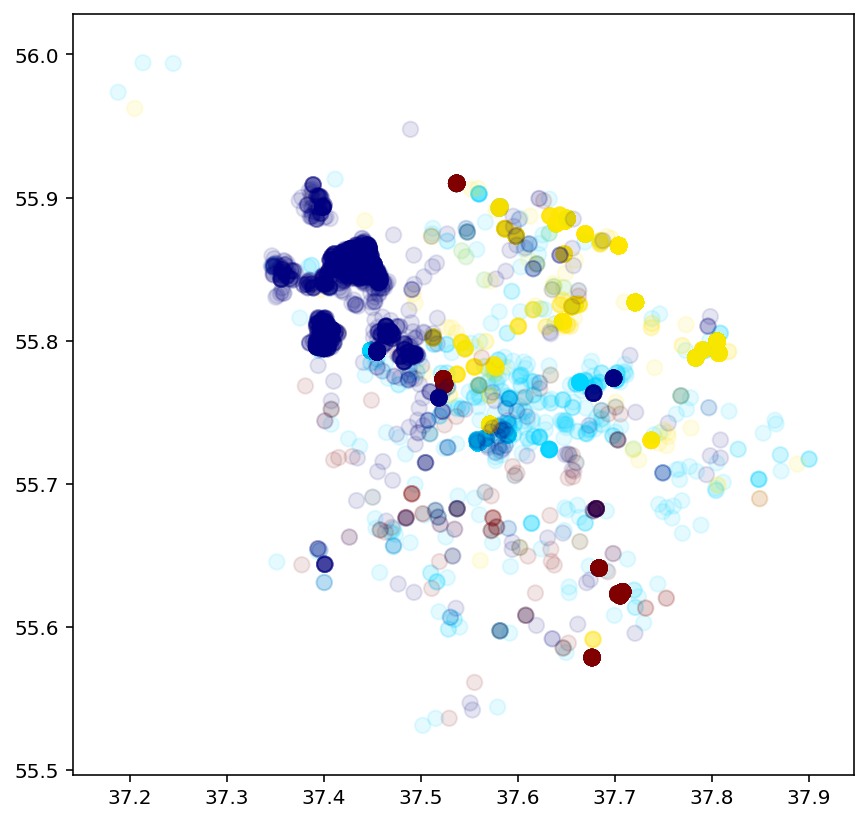

In [18]:
rcParams['figure.figsize'] = (7,7)
    
plt.scatter(data_p_t.x, data_p_t.y, c=clusters_p, alpha=0.1, cmap='jet', s=60)

Делаем все то же самое, только теперь для тех, кто был против

In [19]:
kn_n = KMeans(n_clusters=8)
clusters_n = kn_n.fit_predict(data_n_t)

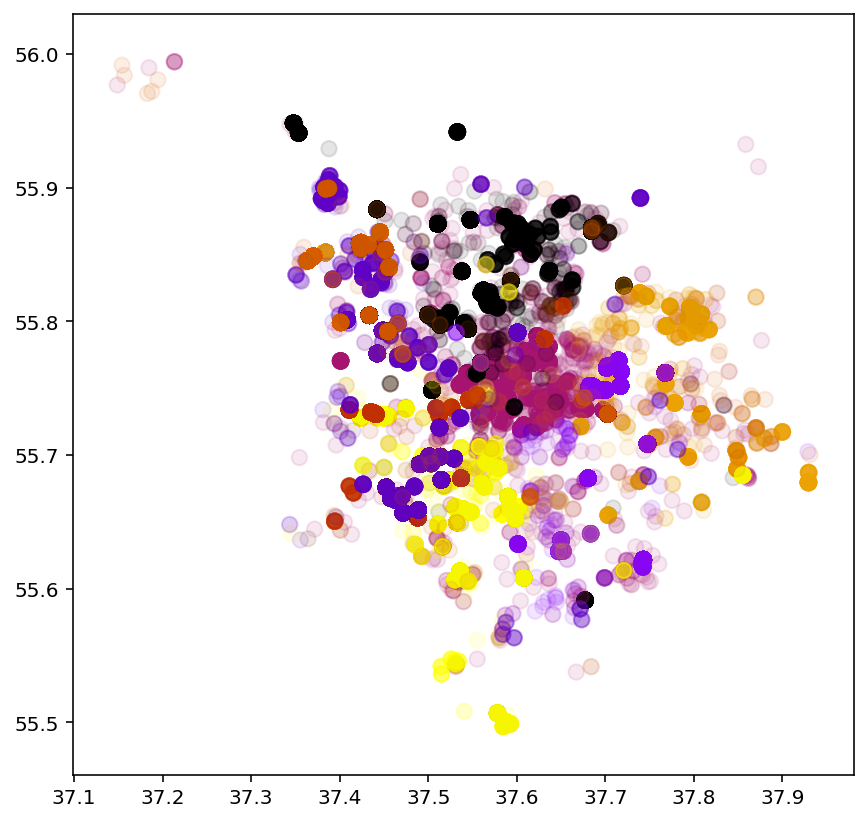

In [20]:
rcParams['figure.figsize'] = (7,7)
plt.scatter(data_n_t.x, data_n_t.y, c=clusters_n, alpha=0.1, cmap='gnuplot', s=60)

найти наиболее активные в голосовании районы 

__DBSCAN__

In [31]:
db_classic = DBSCAN(eps=0.02, min_samples=500, n_jobs=-1 )

In [32]:
db_clusters = db_classic.fit_predict(data_test)

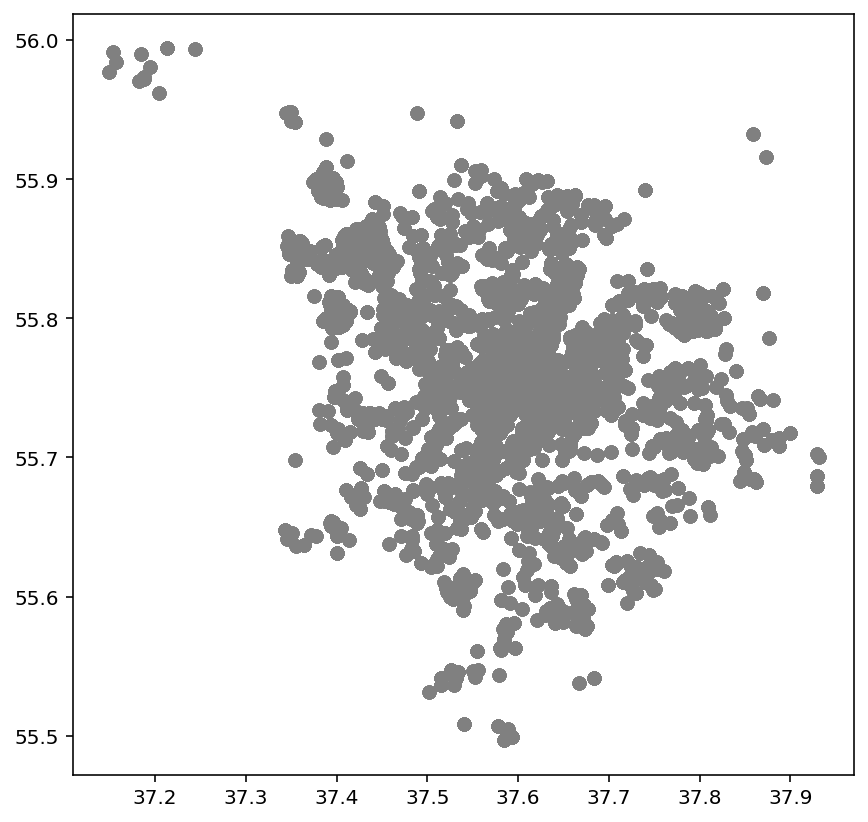

In [35]:
rcParams['figure.figsize'] = (7,7)
for i,color in zip(range(10),{'blue','red','green','black','orange','yellow','brown','orchid','lime'}):
    x_i = data_test.x[db_clusters==i]
    y_i = data_test.y[db_clusters==i]
    plt.plot(x_i, y_i, 'ro', c=color)
    
    x_0 = data_test.x[db_clusters==-1]
    y_0 = data_test.y[db_clusters==-1]
    plt.plot(x_0, y_0, 'ro', c='grey')